In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

**Загрузка данных**

In [47]:
# Загружаем датасет фильмов
bollywood_movies = pd.read_csv("C:/Users/bandy/Downloads/bollywood_movies.csv")


In [48]:
# Отображаем первые несколько строк набора данных
bollywood_movies.head()

,id,title,year,rating
0,872906,Jawan,2023.0,7.3
1,554600,Uri: The Surgical Strike,2019.0,7.2
2,781732,Animal,2023.0,7.4
3,975533,The Archies,2023.0,7.1
4,734253,Adipurush,2023.0,5.3


In [49]:
# Выводим количество строк, количество столбцов
print(bollywood_movies.shape)

(7419, 4)


**Обработка данных**

In [50]:
# Отображаем статистику
bollywood_movies.describe()

,id,year,rating
count,7.419000e+03,7066.000000,7419.000000
mean,5.398327e+05,1997.956977,3.299690
std,3.492537e+05,22.052941,3.329836
min,4.800000e+02,1913.000000,0.000000
25%,2.760925e+05,1983.250000,0.000000
50%,4.853830e+05,2004.000000,3.500000
75%,8.326715e+05,2017.000000,6.200000
max,1.218602e+06,2026.000000,10.000000


In [51]:
# Создаю копию набора данных, удаляю строки с пропущенными значениями,сбрасываю индекс после удаления строк
df=bollywood_movies.copy()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [52]:
# Вывожу набор данных после удаления
df.shape

(7066, 4)

In [53]:
# Отображаем статистику после удаления значений 
df.describe()

,id,year,rating
count,7.066000e+03,7066.000000,7066.000000
mean,5.188429e+05,1997.956977,3.436159
std,3.407178e+05,22.052941,3.319424
min,4.800000e+02,1913.000000,0.000000
25%,2.688802e+05,1983.250000,0.000000
50%,4.633710e+05,2004.000000,4.000000
75%,8.012785e+05,2017.000000,6.300000
max,1.218599e+06,2026.000000,10.000000


In [55]:
# Предобработка данных
bollywood_movies['title'] = bollywood_movies['title'].str.lower()  # Приведение к нижнему регистру
bollywood_movies['title'] = bollywood_movies['title'].str.replace('[^a-zA-Z0-9 ]', '')  # Удаление спецсимволов

# Обработка NaN значений в столбце 'year'
bollywood_movies['year'] = bollywood_movies['year'].fillna(0).astype(int)  # Замена NaN на 0


In [56]:
# Очищаю заголовок и удаляю цифры, символы, пробелы
import re  

df["title"] = df["title"].apply(lambda x: re.sub("[\W_]+", " ", x).strip())
df.head()

,id,title,year,rating
0,872906,Jawan,2023.0,7.3
1,554600,Uri The Surgical Strike,2019.0,7.2
2,781732,Animal,2023.0,7.4
3,975533,The Archies,2023.0,7.1
4,734253,Adipurush,2023.0,5.3


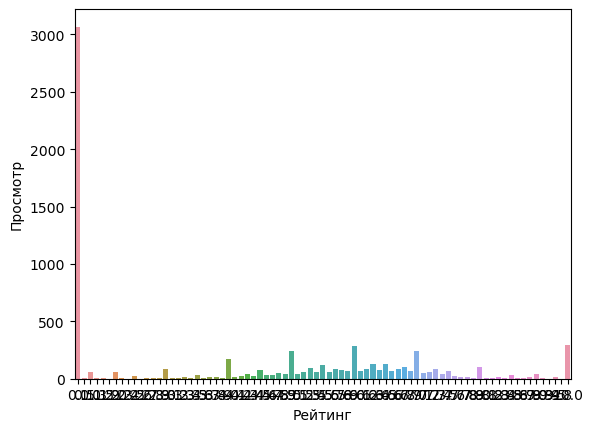

In [57]:
# Создаю график подсчета для рейтинга
sns.countplot(data=df , x='rating')
plt.xlabel('Рейтинг')
plt.ylabel('Просмотр')
plt.show()

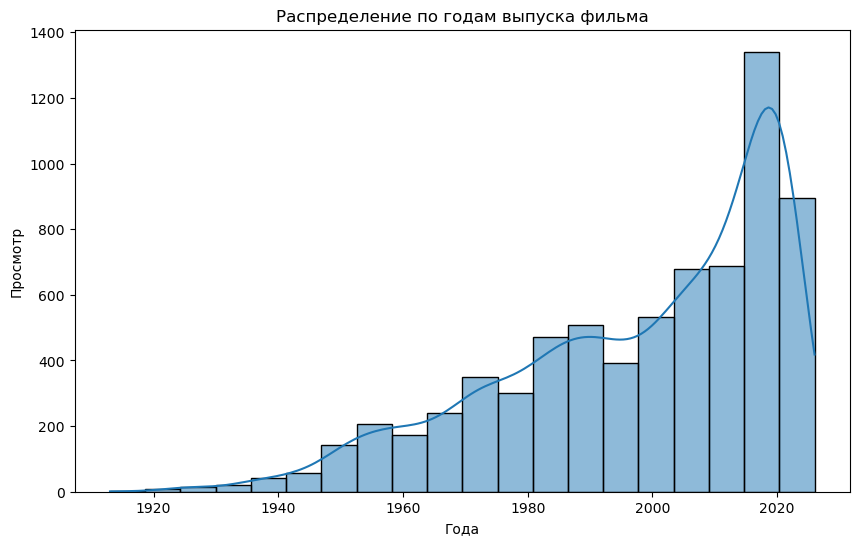

In [58]:
# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='year', bins=20, kde=True)
plt.title('Распределение по годам выпуска фильма')
plt.xlabel('Года')
plt.ylabel('Просмотр')
plt.show()

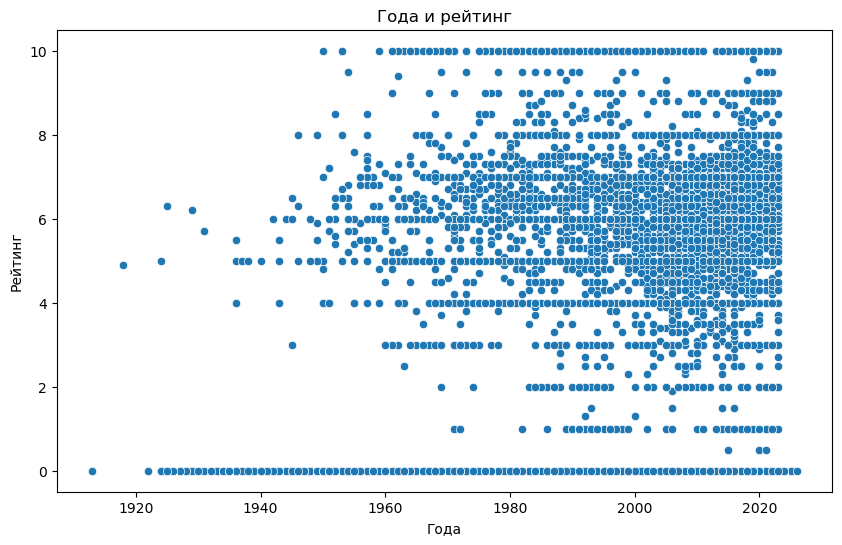

In [59]:
# Точечный график
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='rating')
plt.title('Года и рейтинг')
plt.xlabel('Года')
plt.ylabel('Рейтинг')
plt.show()

**Система рекомендаций на основе взвешенных рейтингов**

Взвешенные: рекомендациям, полученным разными методами, присваивается различный вес – то есть, некоторые рекомендации считаются более предпочтительными, нежели другие.

In [60]:
# Расчет средних оценок, сброс индекса, переименование столбца
avg_ratings = df.groupby('title')['rating'].mean().reset_index().rename(columns={'rating': 'avg_rating'})
# Сортировка по среднему рейтингу в порядке убывания
avg=pd.DataFrame(avg_ratings).sort_values('avg_rating',ascending=False)

In [61]:
# Отображает 10 лучших фильмов с самым высоким рейтингом
avg.head(10)

,title,avg_rating
5254,Sargoshiyan,10.0
480,Anjaane The Unkown,10.0
6467,Woodstock Villa,10.0
3410,Krishna The Birth,10.0
467,Angrakshak,10.0
3437,Kudrat Ka Kanoon,10.0
1680,Dil Kabaddi,10.0
3476,Laal Ghaas Par Neele Ghode,10.0
3513,Lakhon Ki Baat,10.0
3530,Lappu sa Sachin,10.0


In [62]:
# Поиск фильма с названием
df[df['title']=='Lappu sa Sachin']

,id,title,year,rating
5673,1169921,Lappu sa Sachin,2023.0,10.0


In [63]:
# Подсчет, сколько раз название каждого фильма появляется в датасете и переименовывает столбец
cnt_ratings = df.groupby('title')['rating'].count().reset_index().rename(columns={'rating': 'count_rating'})
# Сортировка по количеству фильмов, в порядке убывания
cnt=pd.DataFrame(cnt_ratings).sort_values('count_rating',ascending=False)

In [64]:
# отображение 10 самых часто встречающихся фильмов
cnt.head(10)

,title,count_rating
1863,Dushman,4
2544,Hulchul,4
5123,Saazish,3
1534,Deedar,3
879,Bhabhi,3
1999,Faraar,3
4186,Musafir,3
3795,Majboor,3
2490,Himmatwala,3
5209,Sanam Teri Kasam,3


In [65]:
# Обьединение среднегорейтинга и количества фильмов
popularite=avg.merge(cnt,on='title')

In [66]:
# Отображение 10 самых популярных фильмов
popularite.head(10)

,title,avg_rating,count_rating
0,Sargoshiyan,10.0,1
1,Anjaane The Unkown,10.0,1
2,Woodstock Villa,10.0,1
3,Krishna The Birth,10.0,1
4,Angrakshak,10.0,1
5,Kudrat Ka Kanoon,10.0,1
6,Dil Kabaddi,10.0,1
7,Laal Ghaas Par Neele Ghode,10.0,1
8,Lakhon Ki Baat,10.0,1
9,Lappu sa Sachin,10.0,1


In [67]:
# Анаализ популярности фильмов, последние 10
popularite.tail(10)

,title,avg_rating,count_rating
6640,Karm Yodha,0.0,1
6641,Karma Strikes,0.0,1
6642,Karmayogi,0.0,1
6643,Karmon Kee Sazaa,0.0,1
6644,Kartaa,0.0,1
6645,Karwane Hayat,0.0,1
6646,Kasam,0.0,2
6647,Kasam Suhag Ki,0.0,1
6648,Kasganj,0.0,1
6649,宝莱坞零度之恋,0.0,1


In [68]:
# Вычисление взвешенного рейтинга. 
v=popularite["count_rating"]
R=popularite["avg_rating"]
m=v.quantile(0.90)
c=R.mean()
popularite['w_score']=((v*R) + (m*c)) / (v+m)

In [69]:
# Анализ количества фильмов
popularite["count_rating"].describe()

count    6650.000000
mean        1.062556
std         0.271462
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: count_rating, dtype: float64

In [70]:
# Сортировка по взвешенному рейтингу
pop_sort=popularite.sort_values('w_score',ascending=False)
pop_sort

,title,avg_rating,count_rating,w_score
141,Bekhudi,10.000000,2,7.813233
260,Loha,9.650000,2,7.579899
287,Jurmana,9.000000,2,7.146566
361,Benaam,8.500000,2,6.813233
360,Hindustan Ki Kasam,8.500000,2,6.813233
...,...,...,...,...
4566,Wajood,0.000000,2,1.146566
3864,Bhabhi,0.333333,3,1.109924
5120,Dost,0.000000,3,0.859924
5222,Anarkali,0.000000,3,0.859924


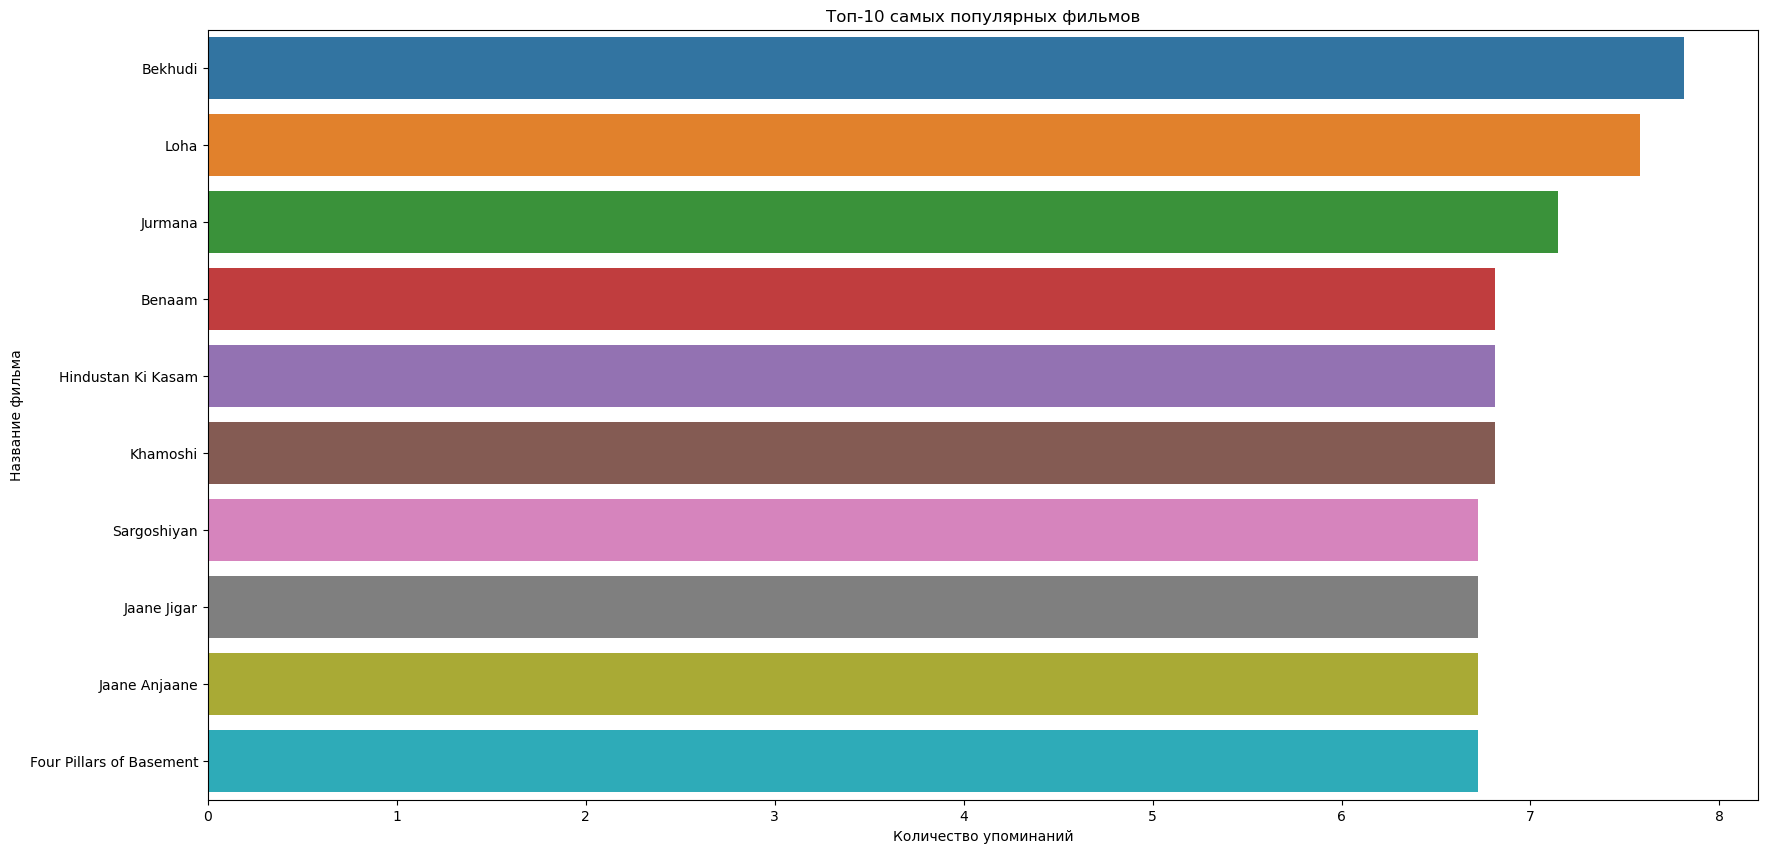

In [71]:
# Визуализация 10 самых популярных фильмов
top_10_books = pop_sort.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='w_score', y='title', data=top_10_books)
plt.xlabel('Количество упоминаний')
plt.ylabel('Название фильма')
plt.title('Топ-10 самых популярных фильмов')
plt.show()

**Cистема рекомендаций по коллаборативной фильтрации (с использованием корреляции)**

In [72]:
# Фильтрация фильмов с меньшим количеством просмотров
new_df=df[df['id'].map(df['id'].value_counts()) < 200]  
new_df

,id,title,year,rating
0,872906,Jawan,2023.0,7.3
1,554600,Uri The Surgical Strike,2019.0,7.2
2,781732,Animal,2023.0,7.4
3,975533,The Archies,2023.0,7.1
4,734253,Adipurush,2023.0,5.3
...,...,...,...,...
7061,72079,Little Terrorist,2004.0,4.8
7062,55820,Chhuppa Chhuppi,1981.0,0.0
7063,54098,Soch Lo,2010.0,5.5
7064,46402,Kisse Pyaar Karoon,2009.0,0.0


In [73]:
# Создание свободной таблицы
movies_pivot=new_df.pivot_table(index=["id"],columns=["title"],values="rating")
movies_pivot.fillna(0,inplace=True)

In [74]:
# Отображение первые несколько строк сводной таблицы
movies_pivot.head()

title,1 1,10 Nahi 40,100 Days,102 Not Out,1080 The Legacy of Mahaveer,12 O Clock,12 o CLOCK,1232 KMs,12th Fail,12x12 Untitled,...,Zulmi,Zwigato,iTales,reverie,sarkari mehmaan,न द sleep,म र आश क,मजद र मजब र मज ब त,स र ग,宝莱坞零度之恋
id,,,,,,,,,,,,,,,,,,,,,
480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# Нахождение похожих фильмов по корреляции оценок. Сравнивает как пользователи оценивали один фильм с тем как они оценивали другие фильмы
def same_movies(movie):
    movies_vote_film=movies_pivot[movie]
    similar_with=movies_pivot.corrwith(movies_vote_film)
    similar_with = pd.DataFrame(similar_with, columns=['correlation'])
    print(similar_with)
    df=similar_with.sort_values('correlation',ascending=False).head(10)
    print(df)
    df_sort=df[df['correlation']>0.8]
    return df_sort

In [76]:
# Находим похожие фильмы по орреляции оценок
same_movies('Jawan')

                             correlation
title                                   
1 1                                  NaN
10 Nahi 40                     -0.000142
100 Days                       -0.000142
102 Not Out                    -0.000142
1080 The Legacy of Mahaveer          NaN
...                                  ...
न द sleep                            NaN
म र आश क                             NaN
मजद र मजब र मज ब त                   NaN
स र ग                                NaN
宝莱坞零度之恋                              NaN

[6650 rows x 1 columns]
                        correlation
title                              
Jawan                      1.000000
Black White               -0.000142
Dhoondte Reh Jaaoge       -0.000142
Kidnap                    -0.000142
Luck                      -0.000142
Krazzy 4                  -0.000142
Sunday                    -0.000142
Kal Kissne Dekha          -0.000142
Na Ghar Ke Na Ghaat Ke    -0.000142
Maine Pyaar Kyun Kiya     -0.000142


,correlation
title,
Jawan,1.0


**Коллаборативная фильтрация: модель NearestNeighbours из scikit-learn для вашей системы рекомендаций**

Коллаборативная фильтрация — популярный метод построения систем рекомендаций, основанных на предпочтениях и поведении пользователей. 
Методы коллаборативной фильтрации дают рекомендации, используя шаблоны и отношения между пользователями и объектами.

Коллаборативная фильтрация на основе пользователей. Этот подход идентифицирует пользователей, похожих на целевого пользователя, на основе их предпочтений, а затем рекомендует элементы, которые понравились этим похожим пользователям. Предполагается, что если пользователи A и B имели схожие предпочтения в прошлом, то то, что нравится одному из них, может понравиться и другому.

In [77]:
df.head()

,id,title,year,rating
0,872906,Jawan,2023.0,7.3
1,554600,Uri The Surgical Strike,2019.0,7.2
2,781732,Animal,2023.0,7.4
3,975533,The Archies,2023.0,7.1
4,734253,Adipurush,2023.0,5.3


In [78]:
movies_pivot

title,1 1,10 Nahi 40,100 Days,102 Not Out,1080 The Legacy of Mahaveer,12 O Clock,12 o CLOCK,1232 KMs,12th Fail,12x12 Untitled,...,Zulmi,Zwigato,iTales,reverie,sarkari mehmaan,न द sleep,म र आश क,मजद र मजब र मज ब त,स र ग,宝莱坞零度之恋
id,,,,,,,,,,,,,,,,,,,,,
480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1216735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1218528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd


movies_df_matrix = csr_matrix(movies_pivot.values)

def find_similar_movies(movie_name, num_neighbors=10):
    # Инициализация модели ближайших соседей
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(movies_df_matrix)
    
    # Найти индекс входного фильма
    movie_index = movies_pivot.columns.get_loc(movie_name)
    
    # Метод ближайших соседей
    distances, indices = model_knn.kneighbors(movies_df_matrix[movie_index], n_neighbors=num_neighbors+1)
    # Исключение первого индекса (который является самим входным фильмом)
    similar_indices = indices[0][1:]
    
    # Получение названия похожих фильмов на основе индексов
    list_similar_movies = [movies_pivot.columns[idx] for idx in similar_indices]
    similar_movies=pd.DataFrame({"Similar movies to":list_similar_movies})
    return similar_movies



In [80]:
# Пример использования
input_movie = "Jawan"  
find_similar_movies(input_movie)

,Similar movies to
0,Prem Granth
1,Prem Kaa Game
2,Prem Aggan
3,Prem Bandhan
4,Prem Deewane
5,Prayas
6,Prem Jaal
7,Prem Mayee
8,Prem Ki Shaadi
9,Pratikar


In [81]:
input_book = "Animal"  
find_similar_movies(input_movie)

,Similar movies to
0,Prem Granth
1,Prem Kaa Game
2,Prem Aggan
3,Prem Bandhan
4,Prem Deewane
5,Prayas
6,Prem Jaal
7,Prem Mayee
8,Prem Ki Shaadi
9,Pratikar


In [82]:
def find_favorite_movies(movie_id, num_movies=10):
    # Инициализация модель ближайших соседей
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(movies_df_matrix)
    
    # Найти индекс входного фильма
    try:
        movie_index = movies_pivot.index.get_loc(movie_id)
    except KeyError:
        print(f"Movie with ID {movie_id} not found in the dataset.")
        return None  

    # Опросите ближайших соседей
    distances, indices = model_knn.kneighbors(movies_df_matrix[movie_index], n_neighbors=num_movies+1)
    # Исключить первый индекс (который является самим входным фильмом)
    favorite_indices = indices[0][1:]
    
    # Получить названия любимых фильмов на основе индексов
    list_favorite_movies = [movies_pivot.columns[idx] for idx in favorite_indices]
    favorite_movies=pd.DataFrame({"favorite movie ":list_favorite_movies})
    return favorite_movies


In [83]:
movie_id= 734253
favorite_movies = find_favorite_movies(movie_id)
if favorite_movies is not None:
    print(favorite_movies)

  favorite movie 
0     Prem Granth
1   Prem Kaa Game
2      Prem Aggan
3    Prem Bandhan
4    Prem Deewane
5          Prayas
6  Prem Ki Shaadi
7     Prem Kahani
8       Prem Jaal
9    Pratigyabadh


**Косинусное сходство**

In [84]:
movies_pivot.head()

title,1 1,10 Nahi 40,100 Days,102 Not Out,1080 The Legacy of Mahaveer,12 O Clock,12 o CLOCK,1232 KMs,12th Fail,12x12 Untitled,...,Zulmi,Zwigato,iTales,reverie,sarkari mehmaan,न द sleep,म र आश क,मजद र मजब र मज ब त,स र ग,宝莱坞零度之恋
id,,,,,,,,,,,,,,,,,,,,,
480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
from sklearn.metrics.pairwise import cosine_similarity 

In [86]:
similarity_score = cosine_similarity(movies_pivot.T)

In [87]:
similarity_score.shape

(6650, 6650)

In [88]:
similarity_score

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
movies_pivot2 = movies_pivot.T

In [95]:
def recommend_movies(movie_title, n=10):
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(bollywood_movies['title'])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    idx = bollywood_movies[bollywood_movies['title'] == movie_title.lower()].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:n + 1]]
    recommendations = bollywood_movies.iloc[movie_indices]
    recommendations = recommendations.sort_values(by='rating', ascending=False)
    recommendations['year'] = recommendations['year'].astype(int).astype(str)
    return recommendations[['title', 'rating']]

In [97]:
recommend_movies("Raju Chacha")

,title,rating
2,animal,7.4
0,jawan,7.3
1,uri: the surgical strike,7.2
1579,raju ban gaya gentleman,7.1
3,the archies,7.1
4894,raju bajrangi,5.0
2160,mighty raju rio calling,1.0
6907,is she raju?,0.0
6545,chacha bhatija - khazane ki khoj,0.0
6494,chacha bhatija - golmaal hai bhai golmaal hai,0.0
